In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import urllib

Populating the interactive namespace from numpy and matplotlib


In [2]:
tb_existing_url_csv = 'https://docs.google.com/spreadsheets/d/1X5Jp7Q8pTs3KLJ5JBWKhncVACGsg5v4xu6badNs4C7I/pub?gid=0&output=csv'
local_tb_existing_file = 'tb_existing_100.csv'
existing_f = urllib.urlretrieve(tb_existing_url_csv, local_tb_existing_file)


In [3]:
existing_df = pd.read_csv(
    local_tb_existing_file, 
    index_col = 0, 
    thousands  = ',')
existing_df.index.names = ['country']
existing_df.columns.names = ['year']

In [4]:
existing_df.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(existing_df)

PCA(copy=True, n_components=2, whiten=False)

In [6]:
existing_2d = pca.transform(existing_df)
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = existing_df.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

,PC1,PC2
country,,
Afghanistan,-732.215864,203.381494
Albania,613.296510,4.715978
Algeria,569.303713,-36.837051
American Samoa,717.082766,5.464696
Andorra,661.802241,11.037736


In [7]:
print(pca.explained_variance_ratio_) 


[ 0.91808789  0.060556  ]


# Plot by Country 

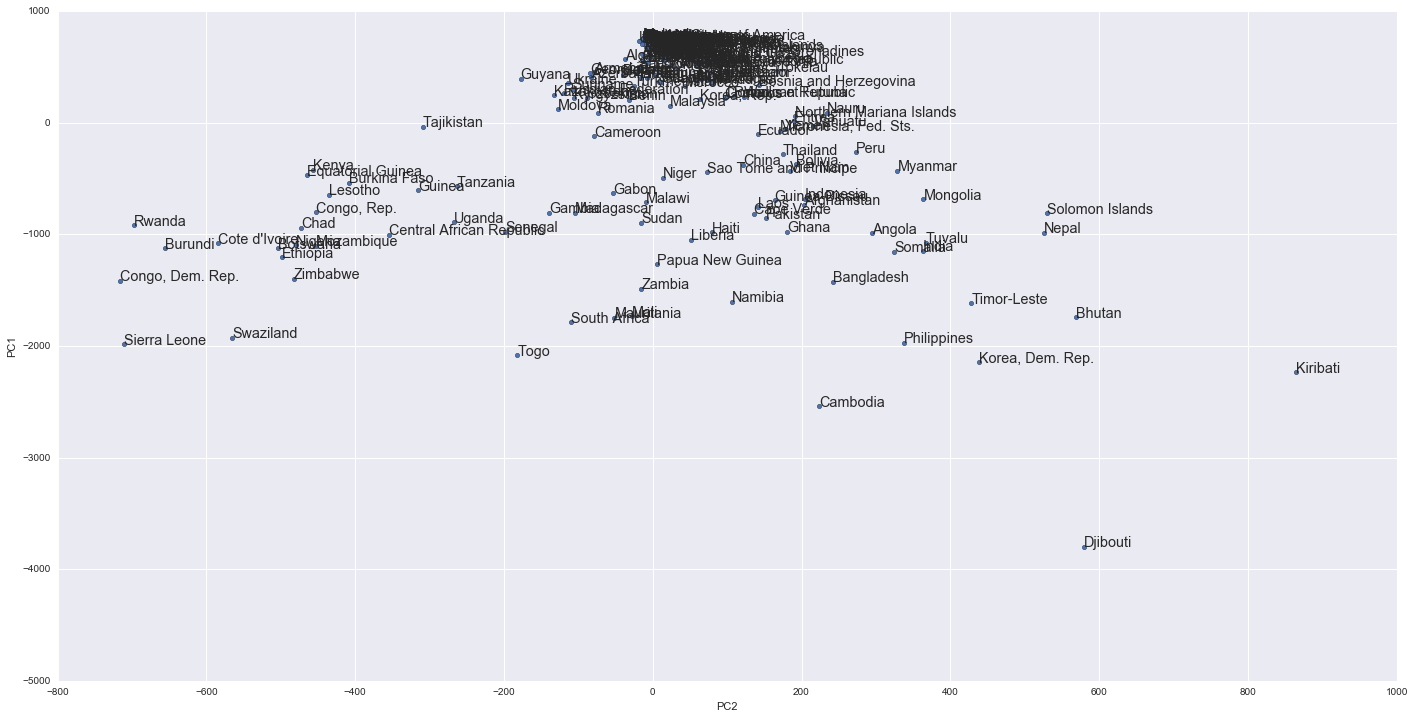

In [8]:
ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(24,12))

for i, country in enumerate(existing_df.index):
    ax.annotate(
        country, 
        (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1),
        fontsize='large'
    )

# Scale by mean

In [9]:
from sklearn.preprocessing import normalize

existing_df_2d['country_mean'] = pd.Series(existing_df.mean(axis=1), index=existing_df_2d.index)
country_mean_max = existing_df_2d['country_mean'].max()
country_mean_min = existing_df_2d['country_mean'].min()
country_mean_scaled = (existing_df_2d.country_mean-country_mean_min) / country_mean_max
existing_df_2d['country_mean_scaled'] = pd.Series(
        country_mean_scaled, 
        index=existing_df_2d.index) 
existing_df_2d.head()

,PC1,PC2,country_mean,country_mean_scaled
country,,,,
Afghanistan,-732.215864,203.381494,353.333333,0.329731
Albania,613.296510,4.715978,36.944444,0.032420
Algeria,569.303713,-36.837051,47.388889,0.042234
American Samoa,717.082766,5.464696,12.277778,0.009240
Andorra,661.802241,11.037736,25.277778,0.021457


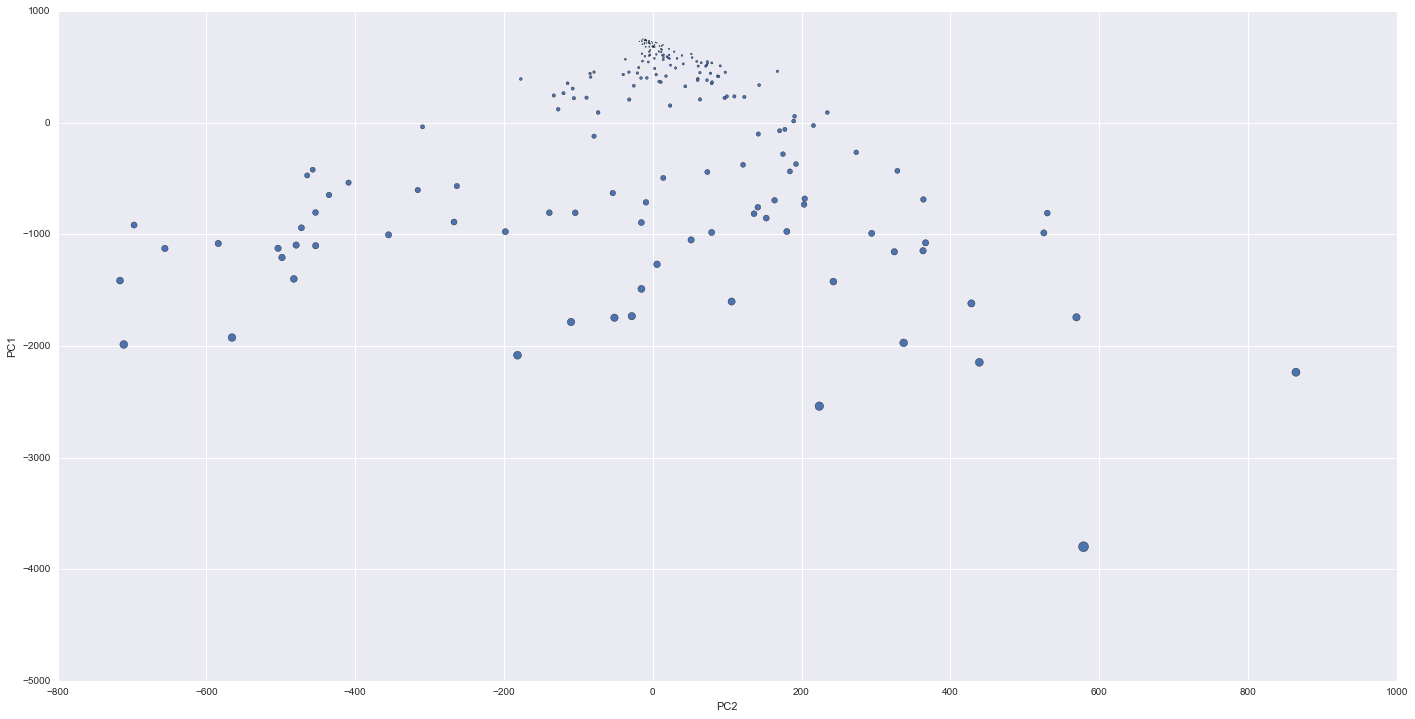

In [10]:
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=existing_df_2d['country_mean_scaled']*100, 
    figsize=(24,12))

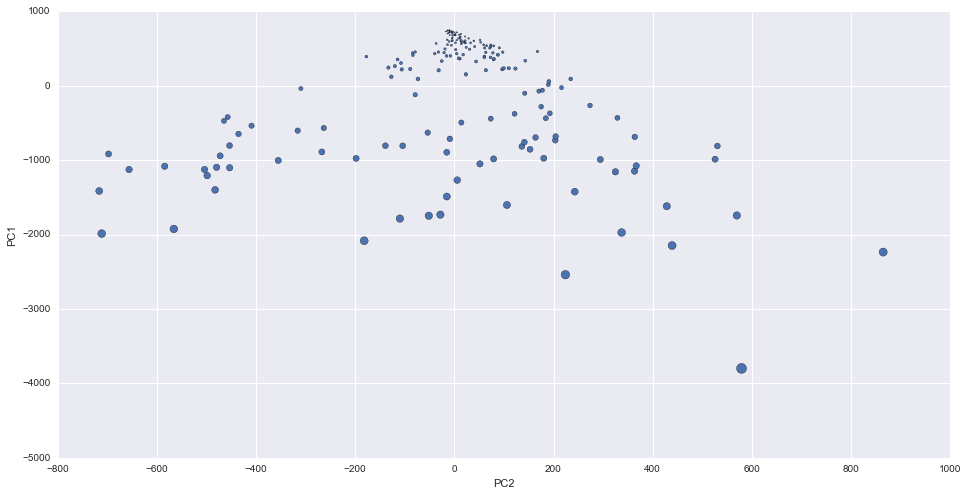

In [11]:
existing_df_2d['country_sum'] = pd.Series(
    existing_df.sum(axis=1), 
    index=existing_df_2d.index)
country_sum_max = existing_df_2d['country_sum'].max()
country_sum_min = existing_df_2d['country_sum'].min()
country_sum_scaled = (existing_df_2d.country_sum-country_sum_min) / country_sum_max
existing_df_2d['country_sum_scaled'] = pd.Series(
        country_sum_scaled, 
        index=existing_df_2d.index)
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', y='PC1', 
    s=existing_df_2d['country_sum_scaled']*100, 
    figsize=(16,8))

In [12]:
existing_df_2d['country_change'] = pd.Series(
    existing_df['2007']-existing_df['1990'], 
    index=existing_df_2d.index)
country_change_max = existing_df_2d['country_change'].max()
country_change_min = existing_df_2d['country_change'].min()
country_change_scaled = (existing_df_2d.country_change - country_change_min) / country_change_max
existing_df_2d['country_change_scaled'] = pd.Series(
        country_change_scaled, 
        index=existing_df_2d.index)
existing_df_2d[['country_change','country_change_scaled']].head()

,country_change,country_change_scaled
country,,
Afghanistan,-198,0.850840
Albania,-20,1.224790
Algeria,11,1.289916
American Samoa,-37,1.189076
Andorra,-20,1.224790


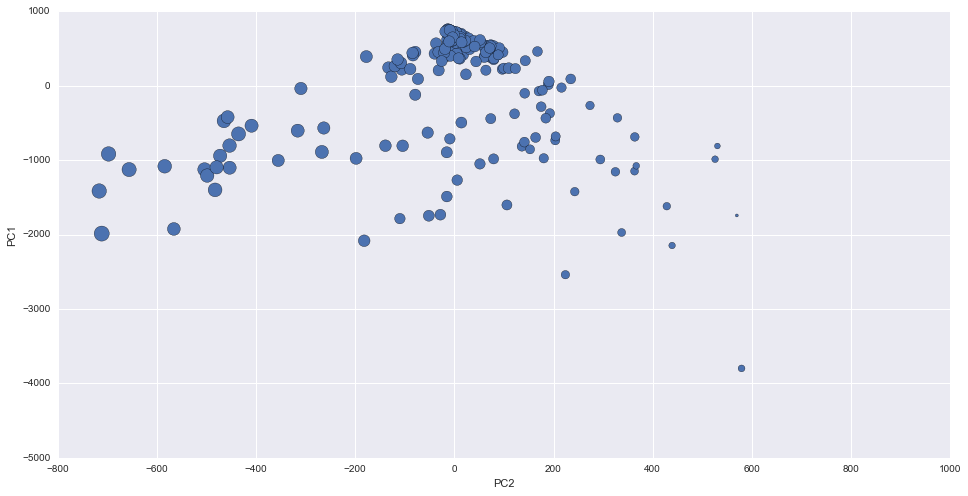

In [13]:
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', y='PC1', 
    s=existing_df_2d['country_change_scaled']*100, 
    figsize=(16,8))

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit(existing_df)


In [15]:
existing_df_2d['cluster'] = pd.Series(clusters.labels_, index=existing_df_2d.index)


In [16]:
existing_df_2d.sort_values(by='cluster').head()

,PC1,PC2,country_mean,country_mean_scaled,country_sum,country_sum_scaled,country_change,country_change_scaled,cluster
country,,,,,,,,,
Montserrat,716.398537,-11.342383,12.611111,0.009554,227,0.009554,-6,1.254202,0
Samoa,636.335973,-4.767621,31.555556,0.027356,568,0.027356,-11,1.243697,0
San Marino,742.009194,-10.407468,6.555556,0.003863,118,0.003863,-4,1.258403,0
Grenada,740.505112,-15.397810,6.944444,0.004229,125,0.004229,-1,1.264706,0
Greece,679.908327,0.579360,21.111111,0.017541,380,0.017541,-14,1.237395,0


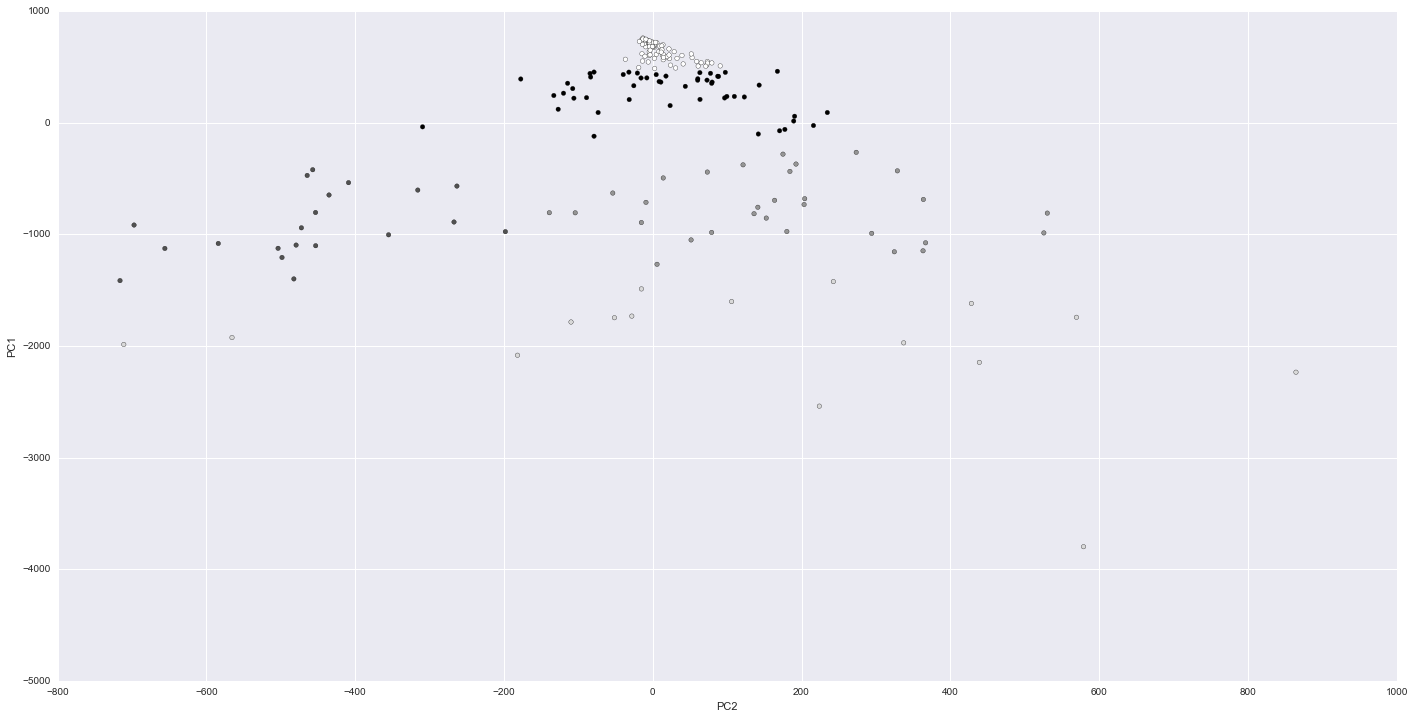

In [17]:
existing_df_2d.plot(
        kind='scatter',
        x='PC2',y='PC1',
        c=existing_df_2d.cluster.astype(np.float), 
        figsize=(24,12))

In [56]:
def add_style(plot_function):
    def new_function(clusters,yr_range,ylim=(0,1000)):
        sns.set_style("white")
        fig, ax = plt.subplots(1,figsize=(22, 12))
        sns.set_context("poster", font_scale=1.25, rc={"lines.linewidth": 1.75,"lines.markersize":8})
        plot_function(clusters,yr_range,ylim=(0,1000))
    return new_function

In [57]:
@add_style
def plot_clusters(clusters, yr_range, ylim=(0,1000)):
    """
    plot clusters
    
    clusters: scipy object
        object cotaining cluster information
    yr_range: ls
        list of years
    ylim: tuple
        ylim 
    """
    for i_cluster in range(clusters.n_clusters):
        plt.plot(yr_range,
                 clusters.cluster_centers_[i_cluster], label='Cluster {}'.format(i_cluster))
    plt.ylim(ylim)
    plt.legend()

In [58]:
f = add_style(plot_clusters)

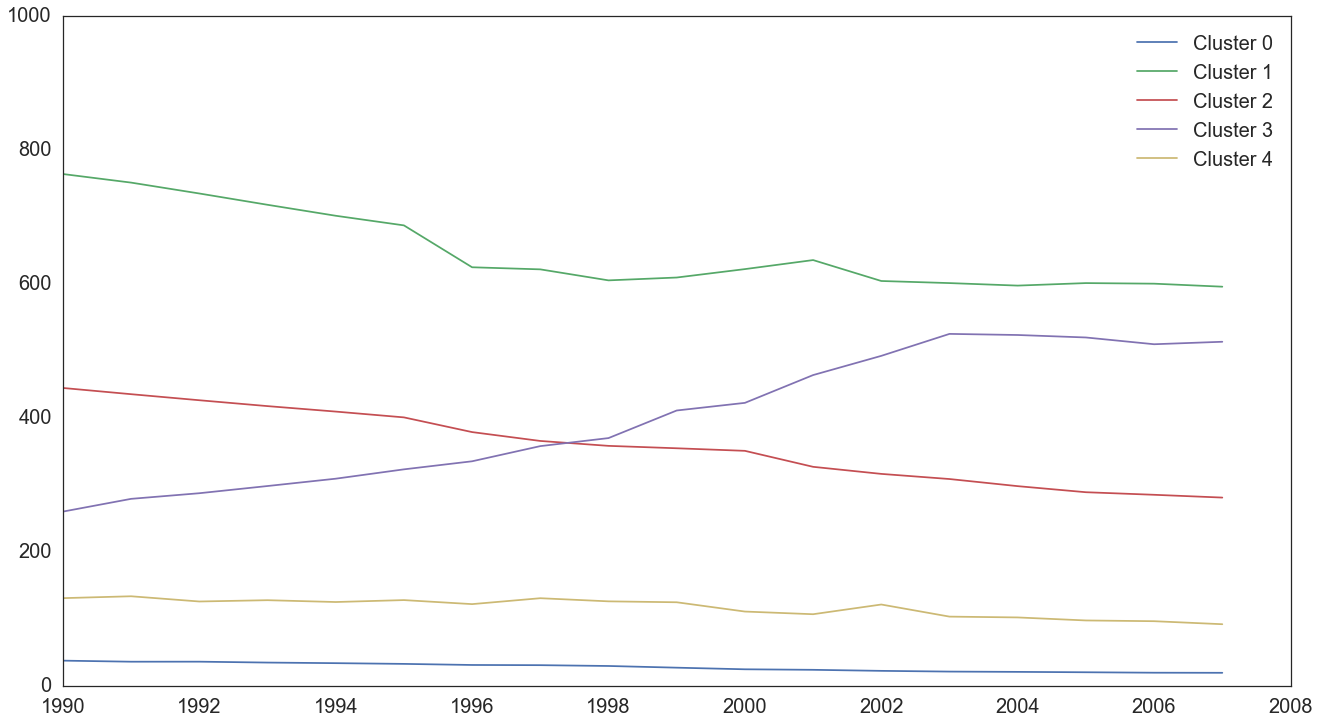

In [59]:
plot_clusters(clusters,
              range(1990,2008))